# Hypothesis testing using ANOVA

## **Introduction**


Analysis of variance (commonly called ANOVA) is a group of statistical techniques that tests the difference of means among three or more groups. It's a powerful tool for determining whether the population means are different across groups and for answering a wide range of business questions.

In this project, I work with historical marketing promotion data. I run a one-way ANOVA, then a post hoc ANOVA test to compare whether there is a significant difference between each pair of categories for TV spending.

In my dataset, each row corresponds to an independent marketing promotion, where my business uses TV, social media, radio, and influencer promotions to increase sales. I had previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion levels.

To address this request, I use a one-way ANOVA test to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


In [2]:
# Import libraries and packages.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for boxplots
from scipy import stats 
import statsmodels.api as sm # to create alias for statsmodel to use in stats.anova_lm(model, type=2) function for
# 1-way & 2-way ANOVAs
from statsmodels.formula.api import ols # to access OLS
from statsmodels.stats.multicomp import pairwise_tukeyhsd # for ANOVA post hoc test to determine which pair(s)
# of category items have statistically significant differences in the mean continuous dependent variable

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`.

In [3]:
# RUN THIS CELL TO IMPORT DATA.

data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Micro, and Nano categories)

I am performing EDA before constructing a linear regression model for the following reasons:
- To become familiar with the feature variables and their attributes (continuous vs. categorical, and if categorical, what are the groupings)
- To understand the dataset by calling the describe function, which generates a statistical summary, i.e., the data distribution (min, max, and means) of continuous variables, and calling the info function, which returns metadata (including data types and count of missing data for determining rows to drop from the dataset during cleaning).
- To surmise preliminarily variables that appear to have strong linear relationships
- To test for linearity between independent and dependent variables by using the pairplot function

## **Step 2: Data exploration** 


Create a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

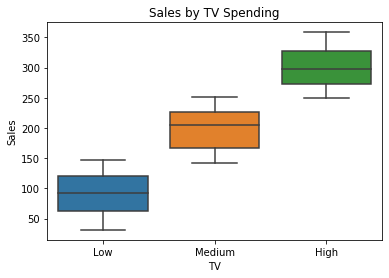

In [4]:
# Create a boxplot with TV and Sales. The boxplot will show the distribution of TV spending across multiple groups

g=sns.boxplot(data=data, x='TV', y='Sales');
g.set_title('Sales by TV Spending');

There is considerable variation in Sales across the three TV spend groupings. The significance of these differences can be tested with a one-way ANOVA used for three or more groups of one categorical variable.

Create a boxplot to determine how `Sales` vary based on the `Influencer` size category.

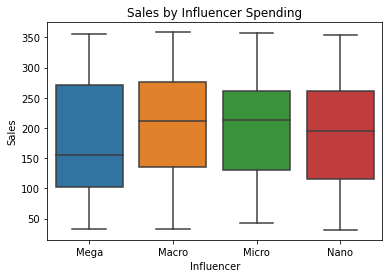

In [5]:
# Create a boxplot with Influencer and Sales.

# Define the desired order of categories, based on industry standards:

'''
Mega-Influencers: Over 1 million followers.
Macro-Influencers: 100,000 to 1 million followers.
Micro-Influencers: 10,000 to 100,000 followers.
Nano-Influencers: < 10,000 followers.
'''

category_order = ['Mega', 'Macro', 'Micro', 'Nano']
g=sns.boxplot(data=data, x='Influencer', y='Sales',  order=category_order)
g.set_title('Sales by Influencer Spending');

There is variation in Sales across the Influencer groups, but it may not be significant.

### Remove missing data

In [6]:
# Identify missing data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [7]:
# Info function has identified missing data for TV, Radio, and Sales, since they reflect only 571 non-null values,
# when there are 572 rows.

# Drop rows that contain missing data and update the DataFrame.

data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            569 non-null    object 
 1   Radio         569 non-null    float64
 2   Social Media  569 non-null    float64
 3   Influencer    569 non-null    object 
 4   Sales         569 non-null    float64
dtypes: float64(3), object(2)
memory usage: 26.7+ KB


In [8]:
# Confirm the data contains no missing values.

data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

## **Step 3: Build model** 


I fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. 

In [9]:
# Define the OLS formula.

ols_formula = 'Sales ~ C(TV)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data=data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          8.81e-256
Time:                        01:25:07   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I chose the categorical variable, TV, because it is clear from the box plot above that TV spending influences the mean Sales, but I want to know whether there is a statistical difference among its levels.

I did not choose Influencer spending because the boxplot above did not show a strong relationship between influencer spending and the mean sales.

### Check model assumptions

Now, I check that the four linear regression assumptions are upheld for my model.

**Linearity assumption met?**

Meeting the linearity assumption is not required because my model does not have any continuous independent variables.

**Independent observation met?**

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

**Normality assumption met?**

I will calculate a histogram of residuals and a Q-Q plot of residuals to determine whether the normality assumption is met.

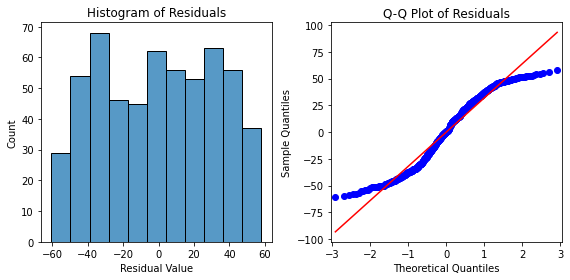

In [10]:
# Calculate the residuals.

residuals = model.resid

# Create 1x2 plot figures.

fig, axes = plt.subplots(1, 2, figsize = (8,4));

# Create a histogram with the residuals. 

sns.histplot(residuals, ax=axes[0])

# Set x label of residual plot.

axes[0].set_xlabel('Residual Value')

# Set title of residual plot.

axes[0].set_title('Histogram of Residuals')

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line = 's', ax=axes[1])

# Set title of QQ plot.

axes[1].set_title('Q-Q Plot of Residuals')

# Use matplotlib’s tight_layout() function to add space betw’n plots for cleaner appearance; will show plots.

plt.tight_layout()

The normality assumption is not met when TV is used as the independent variable predicting Sales. The Q-Q plot forms an S-curve that deviates from the red diagonal line, which is not desired behavior. Specifically, the S-curve is inverted (above the line at the lower end, on the line in the middle, and below the line at the upper end), suggesting that the residuals have lighter tails than a normal distribution. This means there are fewer extreme values in the residuals than expected. This type of S-curve distribution with lighter tails than a normal distribution is called platykurtic.

**Constant variance (homoscedasticity) assumption met?**

I will create a scatter plot with the fitted values from the model vs. the residuals to determine whether the constant variance (homoscedasticity) assumption is met for this model.

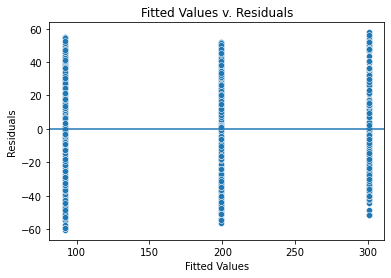

In [11]:
# Create a scatter plot with the fitted values from the model and the residuals.

# Get predictions (fitted values) from model for x-axis

fitted_values = model.fittedvalues

# Access residuals, difference betw’n actual & fitted values, using model resid attribute, for y-axis

residuals = model.resid

#Call homoscedasticity scatter plot

fig = sns.scatterplot(x=fitted_values, y=residuals)

# Set x-axis & y-axis labels

fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')

# Set title of homoscedasticity scatter plot.

fig.set_title('Fitted Values v. Residuals')

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0);

The variance shows that the fitted values is similarly distributed above and below the zero-residual line, which validates that the constant variance assumption is met.

## **Step 4: Results and evaluation** 

I will display the OLS regression results.

In [12]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          8.81e-256
Time:                        01:25:07   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

My model's R-squared value is 0.874. This value indicates that 87% of the variation in mean sales is explained by TV spending. Since the possible R-squared range is 0 to one (inclusive), 0.874 indicates a very strong correlation between TV spending and mean Sales. This makes the model an effective predictor of Sales.

The coefficients for the TV spend category has three levels. Since the TV high spend is not reflected in the OLS Regression Results, it means that it's the default spend level, i.e., the other levels are being compared to a high TV spend level. Therefore, in the case of comparing low TV spend to high TV spend, if all other characteristics are the same, the model predicts that the mean Sales would be \$`208.8` million less relative to high TV spend. Likewise, there is a similar pattern for medium TV spend which the model predicts would be $101.5 million less than high TV spend. The coefficient estimates are statistically significant at the p=0.05 significance level because the p-value for all coefficients is 0.000. The 95% confidence interval for the model is as follows:
- y-intercept \[295.783, 305.276\]
- slope of TV Low Spend \[-215.353, -202.274\]
- slope of TV Med Spend \[-108.038, -94.975\]
This confidence interval means that there is a 95\% chance that the interval contains the true parameter.

Given how accurate `TV` was as a predictor, the model could be improved with a more granular view of the `TV` promotions, such as additional categories or the actual `TV` promotion budgets. Further, additional variables, such as the location of the marketing campaign or the time of year, may increase model accuracy. 

### One-way ANOVA test

With the model fit results, I will run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [13]:
# Create a one-way ANOVA table for the fit model. Choosing type 2 for Sums of Squares
# since testing main effects without considering interactions of the levels.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


**Null and alternative hypotheses for the ANOVA test:**

The null and alternative hypotheses for the ANOVA test are:

- Null: There is no difference in the mean Sales based on TV spend levels of low, medium or high.
- $H_{0}$: salesLow = salesMedium = salesHigh

- Alternative: There is a difference in the mean Sales based on TV spend levels of low, medium or high.
- $H_{1}$: Not(salesLow = salesMedium = salesHigh)

**Conclusion from the one-way ANOVA test:**

Given an F-statistic of 1971.4 and a p-value of $8.81 x 10^{-256}$, the likelihood of falsely rejecting the null hypothesis when it is true is miniscule, since the p-value is $8.81 x 10^{-256}$ vs. a significance level of 0.05 with a confidence level of 95%.  Consequently, the analysis rejects the null hypothesis that there is no difference in mean Sales based on TV spend levels.

**ANOVA test results reveal:**

The results of the one-way ANOVA test indicate that the analysis rejects the null hypothesis in favor of the alternative hypothesis, which states that there is a statistically significant difference in mean `Sales` among the `TV` groups.

### An ANOVA post hoc test

Given that I have significant results from the one-way ANOVA test, I will apply ANOVA post hoc tests, such as the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [14]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data['Sales'], groups = data['TV'], alpha = 0.05)
tukey_oneway_summary=tukey_oneway.summary()
print(tukey_oneway_summary);

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
  High    Low -208.8133 0.001  -216.637 -200.9896   True
  High Medium -101.5061 0.001 -109.3204  -93.6918   True
   Low Medium  107.3072 0.001   99.7063   114.908   True
--------------------------------------------------------


**My interpretation of the Tukey HSD test:**

Below are the null and alternative hypotheses for the ANOVA post hoc test:

- $H_{0}$: There is no significant difference between the mean Sales for High vs. Low TV spend.
- $H_{1}$: There is a significant difference between the mean Sales for High vs. Low TV spend.

- $H_{0}$: There is no significant difference between the mean Sales for High vs. Medium TV spend.
- $H_{1}$: There is a significant difference between the mean Sales for High vs. Medium TV spend.

- $H_{0}$: There is no significant difference between the mean Sales for Low vs. Medium TV spend.
- $H_{1}$: There is a significant difference between the mean Sales for Low vs. Medium TV spend.

Given the Tukey HSD test results, we can reject all three null hypotheses.  Consequently, there is a significant difference among the means Sales of all TV spend groups.

**Post hoc findings:**

The Tukey HSD post hoc test results shows pairwise comparisons of all combinations of the various TV spend groups, and the rejection of the null hypotheses in all cases.

## **Key Takeaways**

- A boxplot is a useful tool during EDA to visualize the distribution of values for categorical variables and their dependent variable.
- A one-way Anova test shows whether the means of the dependent variable significantly varies due to the categorical variable by computing the F-statistic and p-value, which in combination indicate whether the null hypothesis should be rejected.
- An ANOVA post-hoc test shows which group(s) within the category contributes to a significant difference in the mean dependent variable. 


## **Stakeholders Summary:**

High TV promotion budgets result in significantly more sales than both medium and low TV promotion budgets. Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.

Specifically, following are estimates for the difference between the mean sales resulting from different pairs of TV promotions, as determined by the Tukey's HSD test:

- High and Low TV promotions: \-\$`208.81` million (with 95\% confidence that the exact value for this difference is between -200.99 and -216.64 million dollars).
- High and Medium TV promotions: -$101.51 million (with 95% confidence that the exact value for this difference is between -93.69 and -109.32 million dollars).
- Low and Medium TV promotions: \$`107.31` million (with 95\% confidence that the exact value for this difference is between 99.71 and 114.91 million dollars).

The linear regression model estimating mean Sales from TV has an $R^{2}$ of 0.874, making it an accurate predictor, as it indicates that TV spending explains 87.4\% of the variation in mean Sales. Additionally, the model shows a statistically significant relationship between the TV promotion budget and Sales based on a p-value of 0.000 at the 95\% confidence level.

The results of the one-way ANOVA test whereby the null hypothesis states that there is no significant difference in mean Sales based on the TV promotion budget can be rejected based on the large F-statistic of 1971.4 and very small p-value, which is much smaller than the significance level of 0.05. Through the ANOVA post hoc test, a significant difference between all pairs of TV promotions was determined.


#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)